In [1]:
import pandas as pd
import re
import nltk
import tensorflow as tf
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.cluster import KMeans
import numpy as np

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
input_file = '/content/drive/MyDrive/[CAPSTONE OASEE]/[ML]/[2.1] Dataset/Combined /combined_600_data.csv'

In [5]:
df = pd.read_csv(input_file, encoding='utf-8')

In [6]:
print(df.head())

                                               Title   Timestamp  \
0  NTT Optimistis Persentase Anak Stunting Turun ...  17/05/2023   
1  Kemenperin  Industri Manufaktur Sumbang 70 21 ...  17/05/2023   
2  Tingkatkan Daya Saing Nasional  Industri Hijau...  17/05/2023   
3  Ganjil Genap di Jalur Puncak Berlaku Mulai Har...  17/05/2023   
4      Daftar Lengkap 54 Taman Nasional di Indonesia  17/05/2023   

                                            FullText  \
0  Pencatatan dan Pelaporan Gizi Berbasis Masyara...   
1   Kementerian Perindustrian Kemenperin mengatak...   
2   Menteri Perindustrian Menperin Agus Gumiwang ...   
3   Untuk mencegah terjadinya kemacetan luar bias...   
4  unsur hayati di alam yang terdiri dari sumber ...   

                                                Tags  \
0  NTT stunting SDG02 Tanpa Kelaparan SDG06 Air B...   
1              Ekspor Kemenperin industri manufaktur   
2  industri hijau SDG08 Pekerjaan Layak dan Pertu...   
3  ganjil genap libur nasional

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      600 non-null    object
 1   Timestamp  300 non-null    object
 2   FullText   600 non-null    object
 3   Tags       300 non-null    object
 4   Author     300 non-null    object
 5   Url        600 non-null    object
 6   Label      600 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 32.9+ KB


In [8]:
# Preprocessing teks
stop_words = set(stopwords.words('indonesian'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Menghapus karakter non-alphanumeric
#    text = re.sub('[^a-zA-Z]', ' ', text)

    # Mengubah teks menjadi lowercase
#    text = text.lower()

    # Menghapus stopwords
#    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Stemming kata-kata
#    text = ' '.join([stemmer.stem(word) for word in text.split()])

    return text

df['FullText'] = df['FullText'].apply(preprocess_text)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      600 non-null    object
 1   Timestamp  300 non-null    object
 2   FullText   600 non-null    object
 3   Tags       300 non-null    object
 4   Author     300 non-null    object
 5   Url        600 non-null    object
 6   Label      600 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 32.9+ KB


In [10]:
random_df = df.sample(frac=1)  # Mengacak baris DataFrame
print(random_df)

                                                 Title   Timestamp  \
239  Megawati ke Jenderal TNIPolri Urus Anak Buah J...  21/05/2023   
40   Jokowi Akan Umumkan Pencabutan Status Bencana ...  09/05/2023   
220  Jubir Menhan Pastikan Penambahan Kodam Sudah D...  21/05/2023   
480                      Video Tumpukan Sampah di Cina         NaN   
312   Bunga Pagoda atau Maha Molu bunga keberuntung...         NaN   
..                                                 ...         ...   
341   Dua Bocah Di Kapuk Cengkareng Tewas Terbakar ...         NaN   
132  Jatim Sepekan: Masriah Terancam Bui 3 Bulan hi...  21/05/2023   
145  Isi Surat Tersangka Narkoba ke Polri Soal Barb...  21/05/2023   
571   Raja Tikus Sudah Muncul di Rusia Siap Siap Ba...         NaN   
520   Operasi Marinir Kerajaan Inggris di Ukraina p...         NaN   

                                              FullText  \
239  Jakarta Presiden ke5 RI Megawati Soekarnoputri...   
40    Juru Bicara Kementerian Kesehatan Kem

In [11]:
# Menggunakan TF-IDF untuk mengubah teks menjadi vektor fitur
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(df['FullText']) #

In [12]:
# Memodelkan sentimen dengan autoencoder
input_dim = features.shape[1]
encoding_dim = 128

autoencoder = Sequential()
autoencoder.add(Dense(encoding_dim, activation='relu', input_dim=input_dim))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
# Melatih autoencoder
reordered_features = tf.convert_to_tensor(features.toarray(), dtype=tf.float32)  # Konversi ke Tensor
autoencoder.fit(reordered_features, reordered_features, epochs=50, batch_size=32)

# Menggunakan autoencoder untuk mendapatkan representasi teks yang terkompresi
encoder = Sequential()
encoder.add(autoencoder.layers[0])

compressed_features = encoder.predict(features.toarray())

Epoch 1/50
19/19 [==============================] - 5s 170ms/step - loss: 0.6868
Epoch 2/50
19/19 [==============================] - 4s 191ms/step - loss: 0.6038
Epoch 3/50
19/19 [==============================] - 3s 140ms/step - loss: 0.3151
Epoch 4/50
19/19 [==============================] - 2s 122ms/step - loss: 0.0888
Epoch 5/50
19/19 [==============================] - 3s 145ms/step - loss: 0.0307
Epoch 6/50
19/19 [==============================] - 4s 189ms/step - loss: 0.0173
Epoch 7/50
19/19 [==============================] - 4s 194ms/step - loss: 0.0126
Epoch 8/50
19/19 [==============================] - 2s 129ms/step - loss: 0.0102
Epoch 9/50
19/19 [==============================] - 4s 208ms/step - loss: 0.0087
Epoch 10/50
19/19 [==============================] - 6s 303ms/step - loss: 0.0077
Epoch 11/50
19/19 [==============================] - 4s 184ms/step - loss: 0.0070
Epoch 12/50
19/19 [==============================] - 2s 93ms/step - loss: 0.0064
Epoch 13/50
19/19 [=======

In [14]:
# K-means clustering untuk mengelompokkan berita berdasarkan sentimen
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(compressed_features)

# Membuat label sentimen (positive, neutral, negative) berdasarkan centroid yang terdekat
centroid_labels = kmeans.predict(compressed_features)
centroid_centers = kmeans.cluster_centers_

sentiment_labels = np.array([2, 1, 0])  # 0: negative, 1: neutral, 2: positive

def get_sentiment_label(vector):
    distances = np.linalg.norm(vector - centroid_centers, axis=1)
    closest_centroid = np.argmin(distances)
    
    # Mapping label sentimen
    if sentiment_labels[closest_centroid] == 0:
        sentiment_label = 'negative'
    elif sentiment_labels[closest_centroid] == 1:
        sentiment_label = 'neutral'
    else:
        sentiment_label = 'positive'
    
    return sentiment_label

df['SentimentLabel'] = df['FullText'].apply(lambda x: get_sentiment_label(encoder.predict(vectorizer.transform([preprocess_text(x)]).toarray())))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           600 non-null    object
 1   Timestamp       300 non-null    object
 2   FullText        600 non-null    object
 3   Tags            300 non-null    object
 4   Author          300 non-null    object
 5   Url             600 non-null    object
 6   Label           600 non-null    int64 
 7   SentimentLabel  600 non-null    object
dtypes: int64(1), object(7)
memory usage: 37.6+ KB


In [16]:
random_df = df.sample(frac=1)  # Mengacak baris DataFrame
print(random_df)

                                                 Title   Timestamp  \
155  Narkotika Zombie Bikin Kulit Melepuh Mewabah d...  21/05/2023   
7    INFOGRAFIK  Munculnya Konten Manipulatif Retak...  17/05/2023   
565   Jokowi Larang Umat Islam Buka Puasa Bersama K...         NaN   
230  KSP Respons AHY Kritik Penegakan Hukum Era Jok...  21/05/2023   
287  Polisi Bongkar Praktik Aborsi Ilegal di Jaktim...  20/05/2023   
..                                                 ...         ...   
514   Ditemukan Fosil Manusia Raksasa Berukuran 7 M...         NaN   
104  Temuan Mayat Terpotong di Sukoharjo, Polisi Si...  21/05/2023   
559                          APLIKASI TOKEN PLN GRATIS         NaN   
207  Ganjar Respons Relawan GibranJokowi Dukung Pra...  21/05/2023   
534   Klarifikasi Alshad Ahmad mengenai Kabar Rumah...         NaN   

                                              FullText  \
155  Pemerintah AS menetapkan kombinasi obat tranq ...   
7     Alam semesta kerap menghadirkan sejum

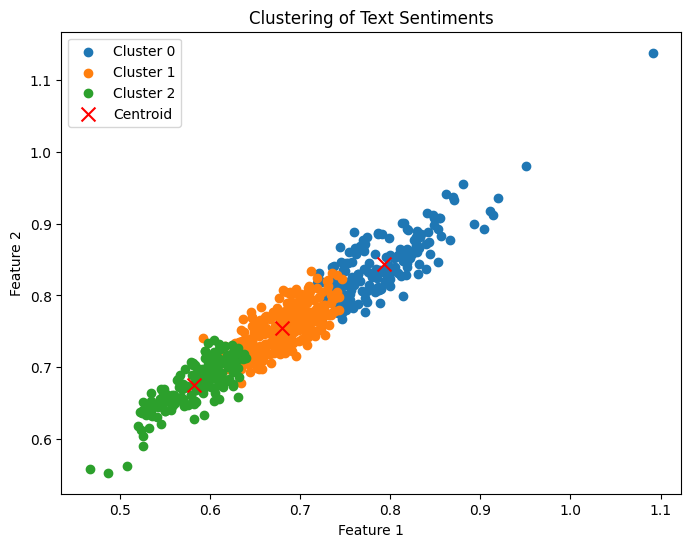

In [17]:
import matplotlib.pyplot as plt

# Mendapatkan dua fitur teratas dari representasi teks yang terkompresi
x = compressed_features[:, 0]  # Fitur pertama
y = compressed_features[:, 1]  # Fitur kedua

# Menggambar scatter plot untuk setiap cluster
plt.figure(figsize=(8, 6))
for label in range(num_clusters):
    cluster_x = x[centroid_labels == label]
    cluster_y = y[centroid_labels == label]
    plt.scatter(cluster_x, cluster_y, label=f'Cluster {label}')

# Menggambar centroid sebagai marker khusus
plt.scatter(centroid_centers[:, 0], centroid_centers[:, 1], marker='x', color='red', s=100, label='Centroid')

plt.title('Clustering of Text Sentiments')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [18]:
# Mapping label sentimen ke dalam nilai integer
label_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}
df['SentimentValue'] = df['SentimentLabel'].map(label_mapping)

In [19]:
# Menghitung probabilitas sentimen
def get_sentiment_probability(vector):
    centroid_centers_broadcasted = np.expand_dims(centroid_centers, axis=0)
    vector_broadcasted = np.expand_dims(vector, axis=1)
    distances = np.linalg.norm(vector_broadcasted - centroid_centers_broadcasted, axis=2)
    sentiment_probabilities = 1 - (distances / np.max(distances) * 2 - 1)
    return sentiment_probabilities

# Mendapatkan representasi teks yang terkompresi
compressed_features = encoder.predict(features.toarray())

# Melakukan prediksi label cluster menggunakan K-means
predicted_labels = kmeans.predict(compressed_features)

# Menghitung centroid centers
centroid_centers = kmeans.cluster_centers_

# Menghitung probabilitas sentimen untuk setiap data
sentiment_probabilities = get_sentiment_probability(compressed_features)

# Normalisasi probabilitas sentimen
scaled_probabilities = 2 * (sentiment_probabilities - np.min(sentiment_probabilities)) / (np.max(sentiment_probabilities) - np.min(sentiment_probabilities)) - 1

# Menyimpan hasil probabilitas sentimen ke dalam DataFrame
df['Sentiment_Probability'] = scaled_probabilities.tolist()

19/19 [==============================] - 0s 6ms/step


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Title                  600 non-null    object
 1   Timestamp              300 non-null    object
 2   FullText               600 non-null    object
 3   Tags                   300 non-null    object
 4   Author                 300 non-null    object
 5   Url                    600 non-null    object
 6   Label                  600 non-null    int64 
 7   SentimentLabel         600 non-null    object
 8   SentimentValue         600 non-null    int64 
 9   Sentiment_Probability  600 non-null    object
dtypes: int64(2), object(8)
memory usage: 47.0+ KB


In [21]:
random_df = df.sample(frac=1)  # Mengacak baris DataFrame
print(random_df)

                                                 Title   Timestamp  \
4        Daftar Lengkap 54 Taman Nasional di Indonesia  17/05/2023   
416                    GINSENG BISA KABUR DAN MELOMPAT         NaN   
234  Anies Bandingkan Pembangunan Jalan Gratis Era ...  21/05/2023   
410         GANJAR GANDENG MAHFUD MD MAJU PILPRES 2024         NaN   
296  Kapolda Papua Minta TNIPolri Siaga Usai Prajur...  20/05/2023   
..                                                 ...         ...   
382                      SWISS MELARANG VAKSIN COVID19         NaN   
597   Video CHINA  SINGAPUR BANGUNIN MACAN TIDUR  M...         NaN   
116  Wanita Ini Punya Hidung Super yang Bisa Deteks...  21/05/2023   
286  JK Hadiri Milad PKS21 di Istora Senayan Anies ...  20/05/2023   
19   Perubahan Format dan Aturan untuk Kompetisi Li...  15/05/2023   

                                              FullText  \
4    unsur hayati di alam yang terdiri dari sumber ...   
416  PENJELASAN di atas klaim ginseng bisa 

Jumlah data: 600


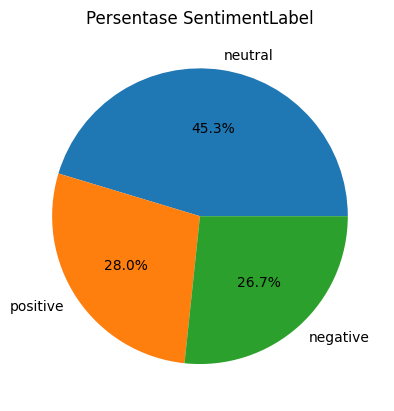

In [22]:
# Menghitung jumlah masing-masing label
label_counts = df['SentimentLabel'].value_counts()

# Menampilkan jumlah data
total_data = len(df)
print("Jumlah data:", total_data)

# Menampilkan pie chart dari kolom 'SentimentLabel'
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Persentase SentimentLabel')
plt.show()

In [23]:
df['SentimentLabel'].value_counts()

neutral     272
positive    168
negative    160
Name: SentimentLabel, dtype: int64

In [24]:
new_file_path = '/content/drive/MyDrive/[CAPSTONE OASEE]/[ML]/[2.6] Model Training/Sentiment Analysis/dataset_sentiment_labeling1.csv'

# Save the modified DataFrame as a new CSV file
df.to_csv(new_file_path, index=False, encoding='utf-8')

print("New CSV file saved successfully.")

New CSV file saved successfully.


# test